In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22372


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22367,2021-05-01,47,沖縄県,105,12568,1,137
22368,2021-05-02,47,沖縄県,57,12625,0,137
22369,2021-05-03,47,沖縄県,57,12682,0,137
22370,2021-05-04,47,沖縄県,33,12715,0,137
22371,2021-05-05,47,沖縄県,63,12778,0,137


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp = all_jp.rename(columns={"各地の死者数_1日ごとの発表数":"各地の死者数合計"})
all_jp.tail()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計
42,静岡県,10472,6640,123
43,香川県,17612,1361,23
44,高知県,18564,1097,20
45,鳥取県,14756,380,2
46,鹿児島県,21896,2358,28


## 人口データを付与

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)

In [5]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口
0,三重県,11424,3958,88,1813859
1,京都府,12376,13162,189,2545899
2,佐賀県,19516,1739,14,823810
3,兵庫県,13328,33591,721,5549568
4,北海道,476,25204,878,5267762


## 人口当たりの感染者数

In [6]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)
all_jp.sort_values("都道府県コード")

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口,１万人当たりの感染者数
4,北海道,476,25204,878,5267762,47.845745
41,青森県,952,1663,24,1275783,13.035132
19,岩手県,1428,1011,33,1235517,8.182809
11,宮城県,1904,8191,69,2292385,35.731345
36,秋田県,2380,536,9,985416,5.439327
15,山形県,2856,1571,34,1082296,14.515438
35,福島県,3332,3608,125,1881981,19.171288
38,茨城県,3808,8384,135,2921436,28.698216
27,栃木県,4284,5468,71,1965516,27.819667
37,群馬県,4760,6352,104,1969439,32.252840


## 感染者数

### 平均値、中央値

In [7]:
all_jp["各地の感染者数合計"].describe()

count        47.000000
mean      13078.638298
std       25496.978082
min         365.000000
25%        1701.000000
50%        3945.000000
75%        8287.500000
max      142943.000000
Name: 各地の感染者数合計, dtype: float64

### TOP 10

In [8]:
all_jp.sort_values("各地の感染者数合計", ascending=False).reset_index(drop=True).head(10)

,都道府県名,都道府県コード,各地の感染者数合計,各地の死者数合計,人口,１万人当たりの感染者数
0,東京都,6188,142943,1899,13834925,103.320401
1,大阪府,12852,85903,1577,8849635,97.069540
2,神奈川県,6664,54642,825,9209442,59.332585
3,埼玉県,5236,38872,746,7390054,52.600428
4,愛知県,10948,34972,641,7575530,46.164427
5,千葉県,5712,33864,627,6319772,53.584212
6,兵庫県,13328,33591,721,5549568,60.529036
7,北海道,476,25204,878,5267762,47.845745
8,福岡県,19040,25055,361,5129841,48.841670
9,京都府,12376,13162,189,2545899,51.698830


## １万人あたりの感染者数

### 平均値、中央値

In [9]:
all_jp["１万人当たりの感染者数"].describe()

count     47.000000
mean      29.983596
std       22.836753
min        5.372988
25%       14.855299
50%       21.820880
75%       40.947886
max      103.320401
Name: １万人当たりの感染者数, dtype: float64

## グラフ化

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [11]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)


<IPython.core.display.Javascript object>


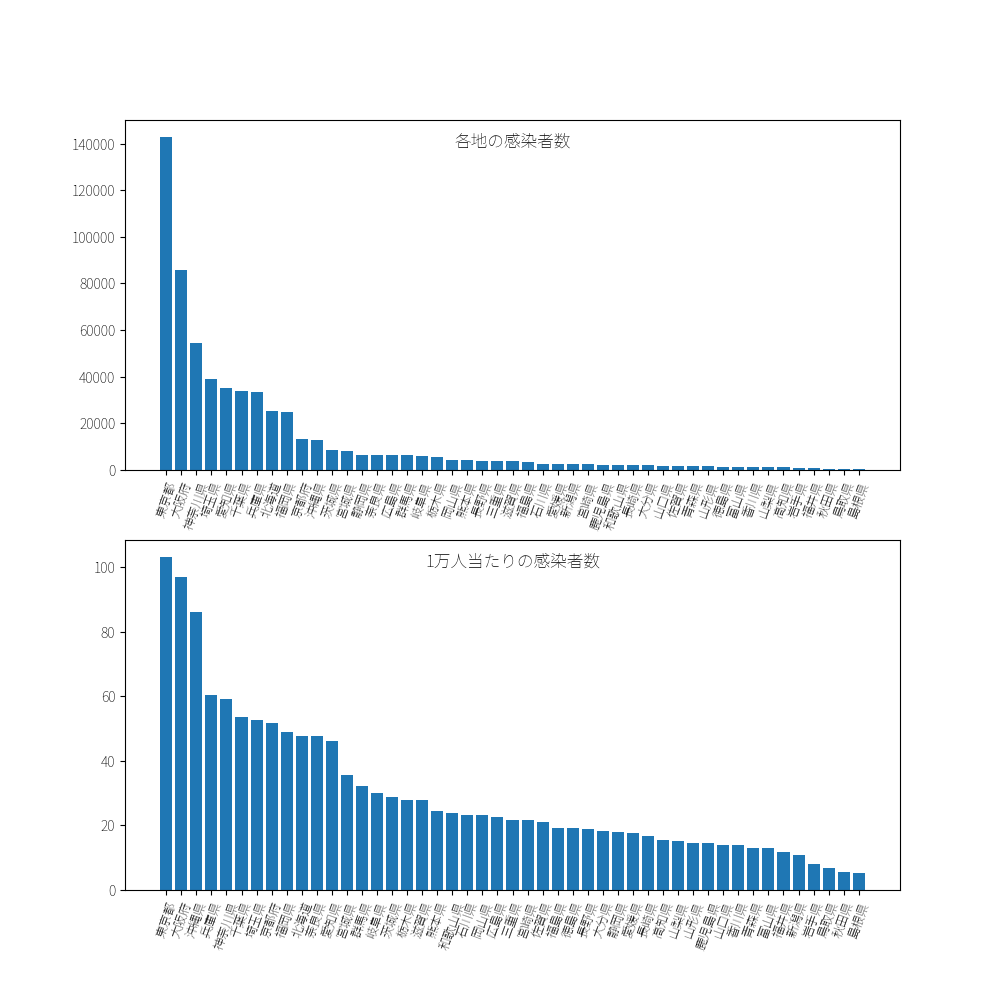

Text(0.5, 0.9, '1万人当たりの感染者数')

In [12]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)


## 度数分布表

In [13]:
import numpy as np
data = np.array(all_jp["各地の感染者数合計"])
 
# ヒストグラム
hist, bin_edges = np.histogram(data, bins=10)

print(hist)
print(bin_edges)

[38  2  4  1  0  1  0  0  0  1]
[   365.   14622.8  28880.6  43138.4  57396.2  71654.   85911.8 100169.6
 114427.4 128685.2 142943. ]


## ヒストグラム

<IPython.core.display.Javascript object>


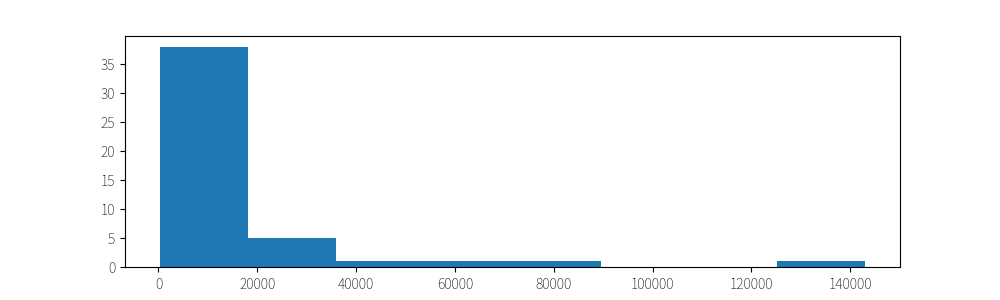

(array([38.,  5.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([   365.  ,  18187.25,  36009.5 ,  53831.75,  71654.  ,  89476.25,
        107298.5 , 125120.75, 142943.  ]),
 <a list of 8 Patch objects>)

In [14]:
fig = plt.figure(figsize=(10,3))
plt.hist(all_jp_desc["各地の感染者数合計"],bins=8)